#**Traffic Dataset on Train YOLO11 Object Detection Model on a Custom Dataset**

In [ ]:
!nvidia-smi

Mon Feb 23 19:14:53 2026       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 580.82.07              Driver Version: 580.82.07      CUDA Version: 13.0     |
+-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   45C    P0             26W /   70W |     495MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

**Step 01 # Install the Ultralytics Package**

In [ ]:
!pip install ultralytics

**Step 02 # Import All the Requried Libraries**

In [ ]:
import ultralytics
ultralytics.checks()

Ultralytics 8.4.14 🚀 Python-3.12.12 torch-2.10.0+cu128 CUDA:0 (Tesla T4, 14913MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 42.2/112.6 GB disk)


In [ ]:
from ultralytics import YOLO
from IPython.display import Image

**Step # 03 Download Dataset from Roboflow**

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="3nB7hTf7Nwo1TMVW9yev")
project = rf.workspace("linux-qurdo").project("traffic-wy5ag-hbf8e")
version = project.version(1)
dataset = version.download("yolov11")


loading Roboflow workspace...
loading Roboflow project...


In [ ]:
dataset.location

'/content/traffic-1'

**Step # 04 Train YOLO11 Model on a Custom Dataset**

In [ ]:
# Load a model
model = YOLO("yolo11n.pt")

# Train the model
train_results = model.train(
    data="/content/traffic-1/data.yaml",  # path to dataset YAML
    epochs=200,  # number of training epochs
    imgsz=640,  # training image size
    device=0,  # device to run on, i.e. device=0 or device=0,1,2,3 or device=cpu
)

Ultralytics 8.4.14 🚀 Python-3.12.12 torch-2.10.0+cu128 CUDA:0 (Tesla T4, 14913MiB)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/traffic-1/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, end2end=None, epochs=200, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=0.0, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.

**Step # 05 Examine Training Results**

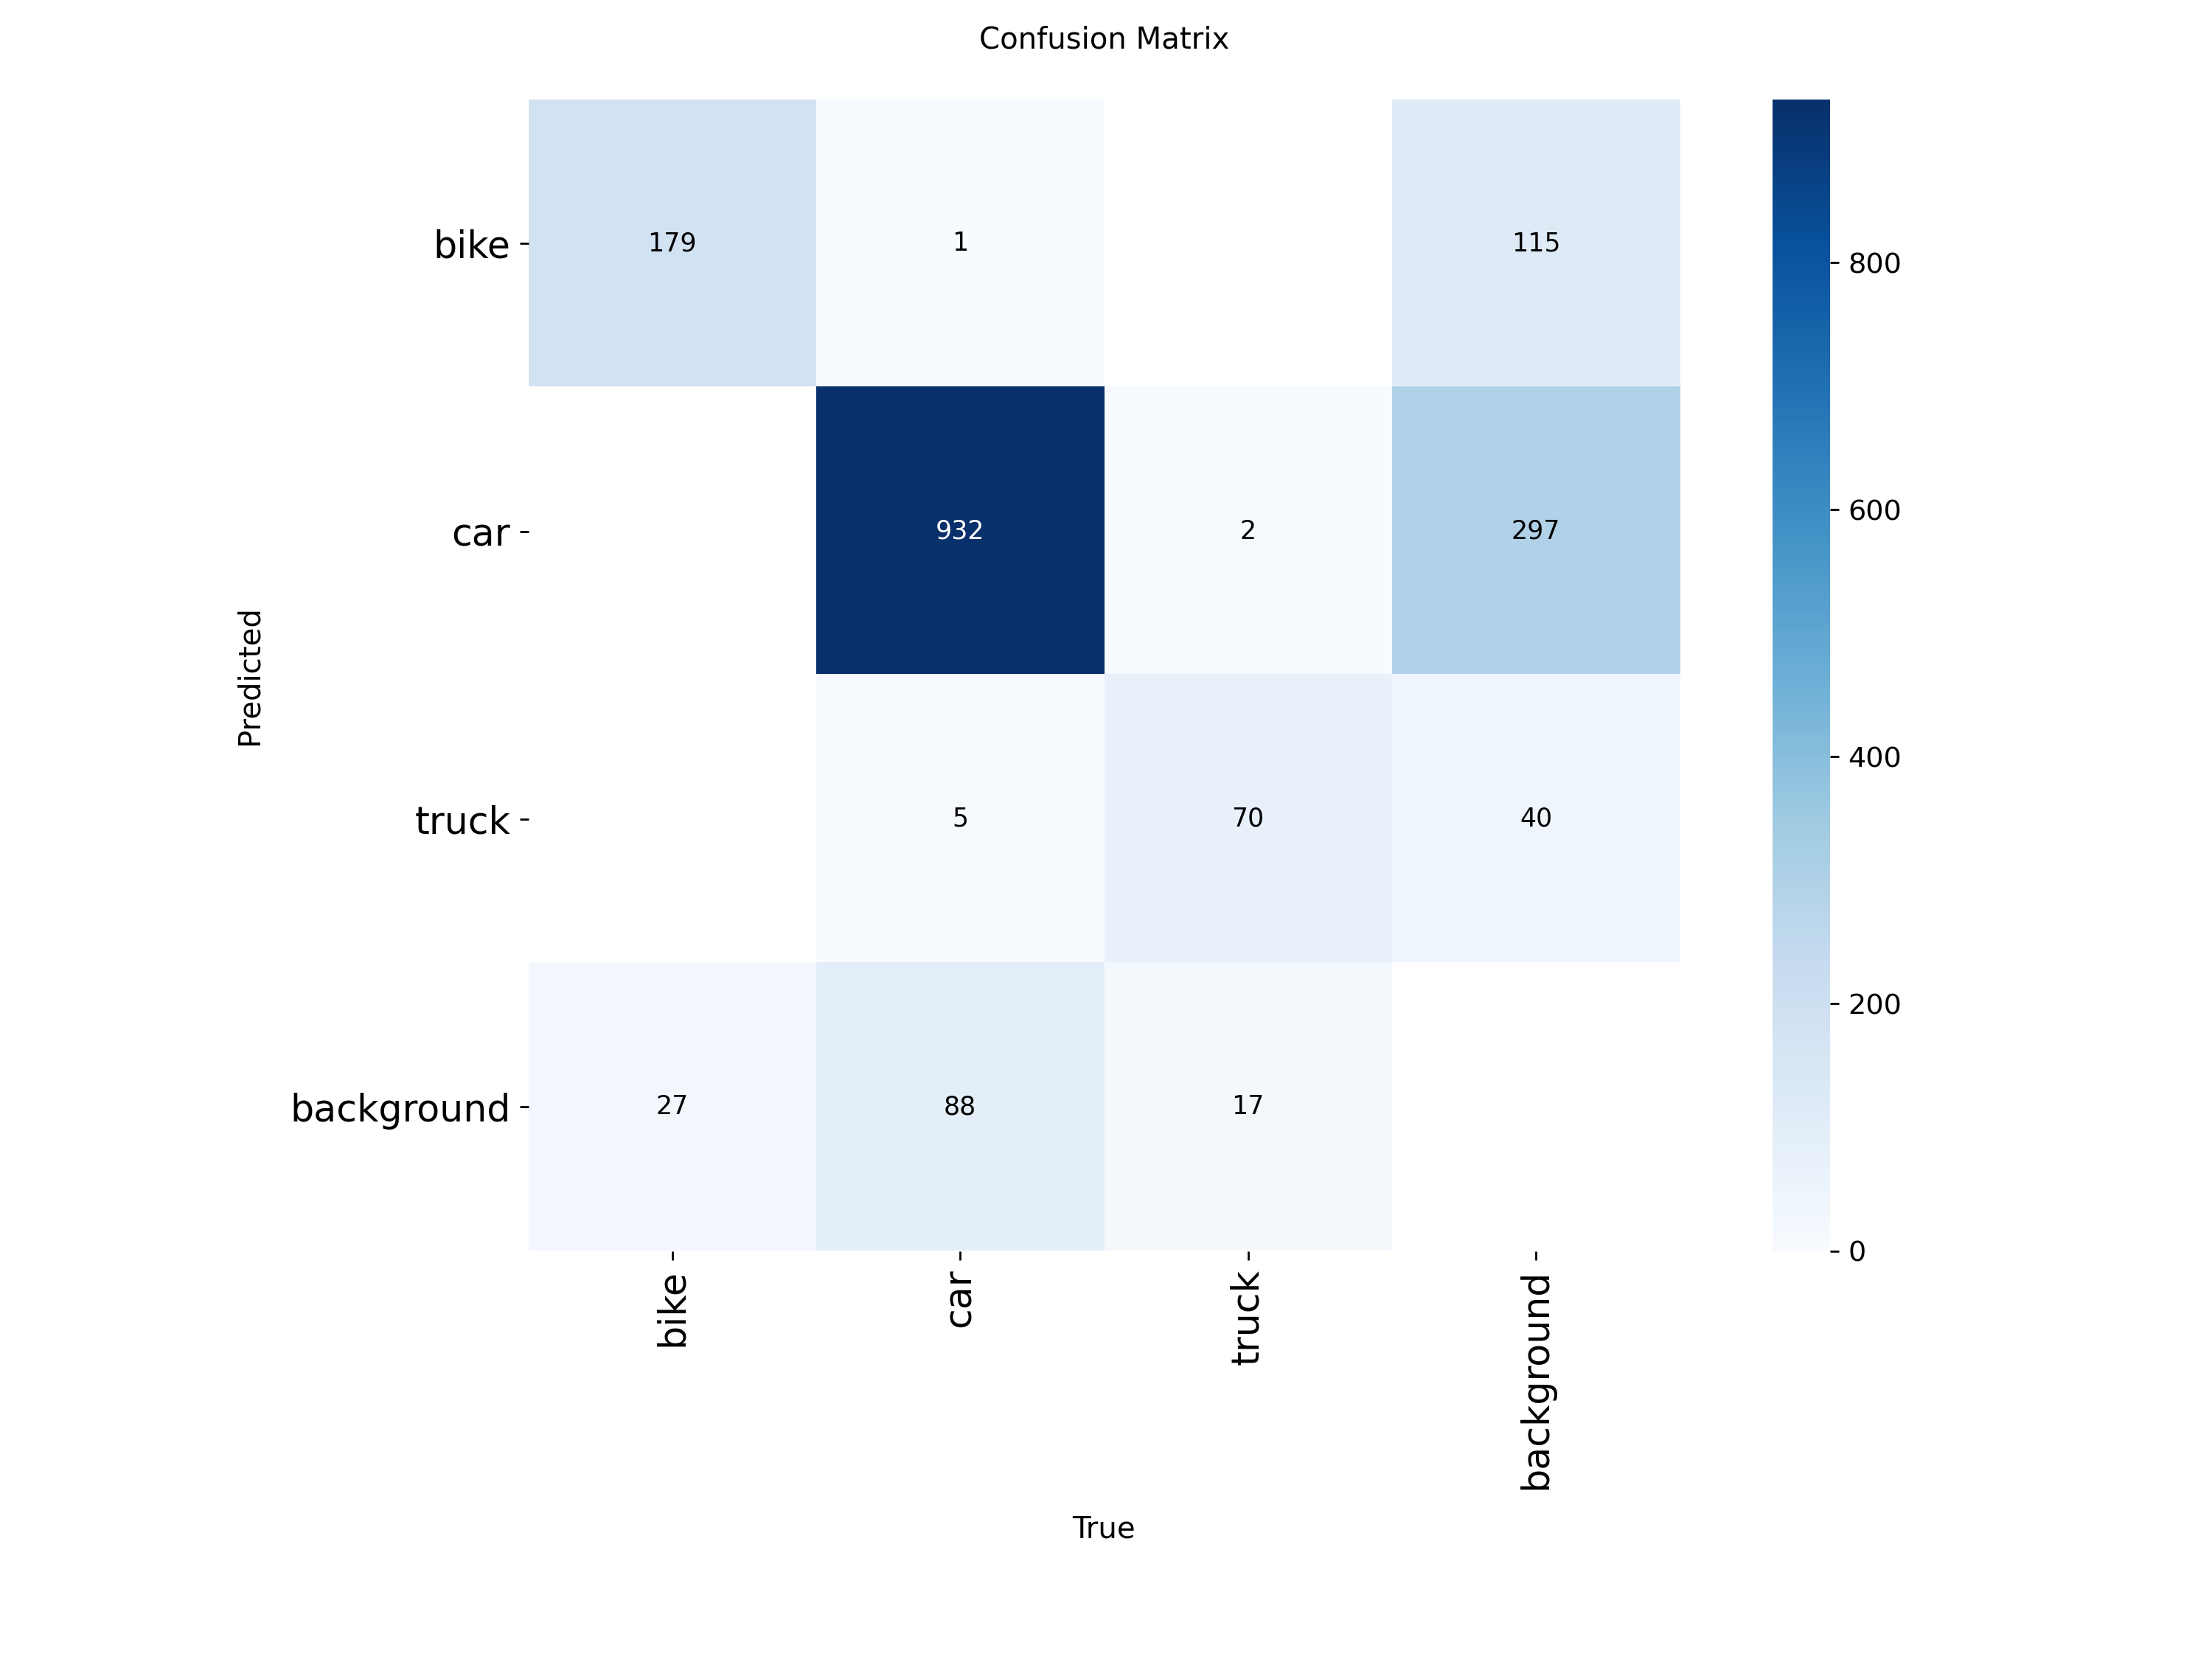

In [ ]:
Image("/content/runs/detect/train/confusion_matrix.png", width=600)

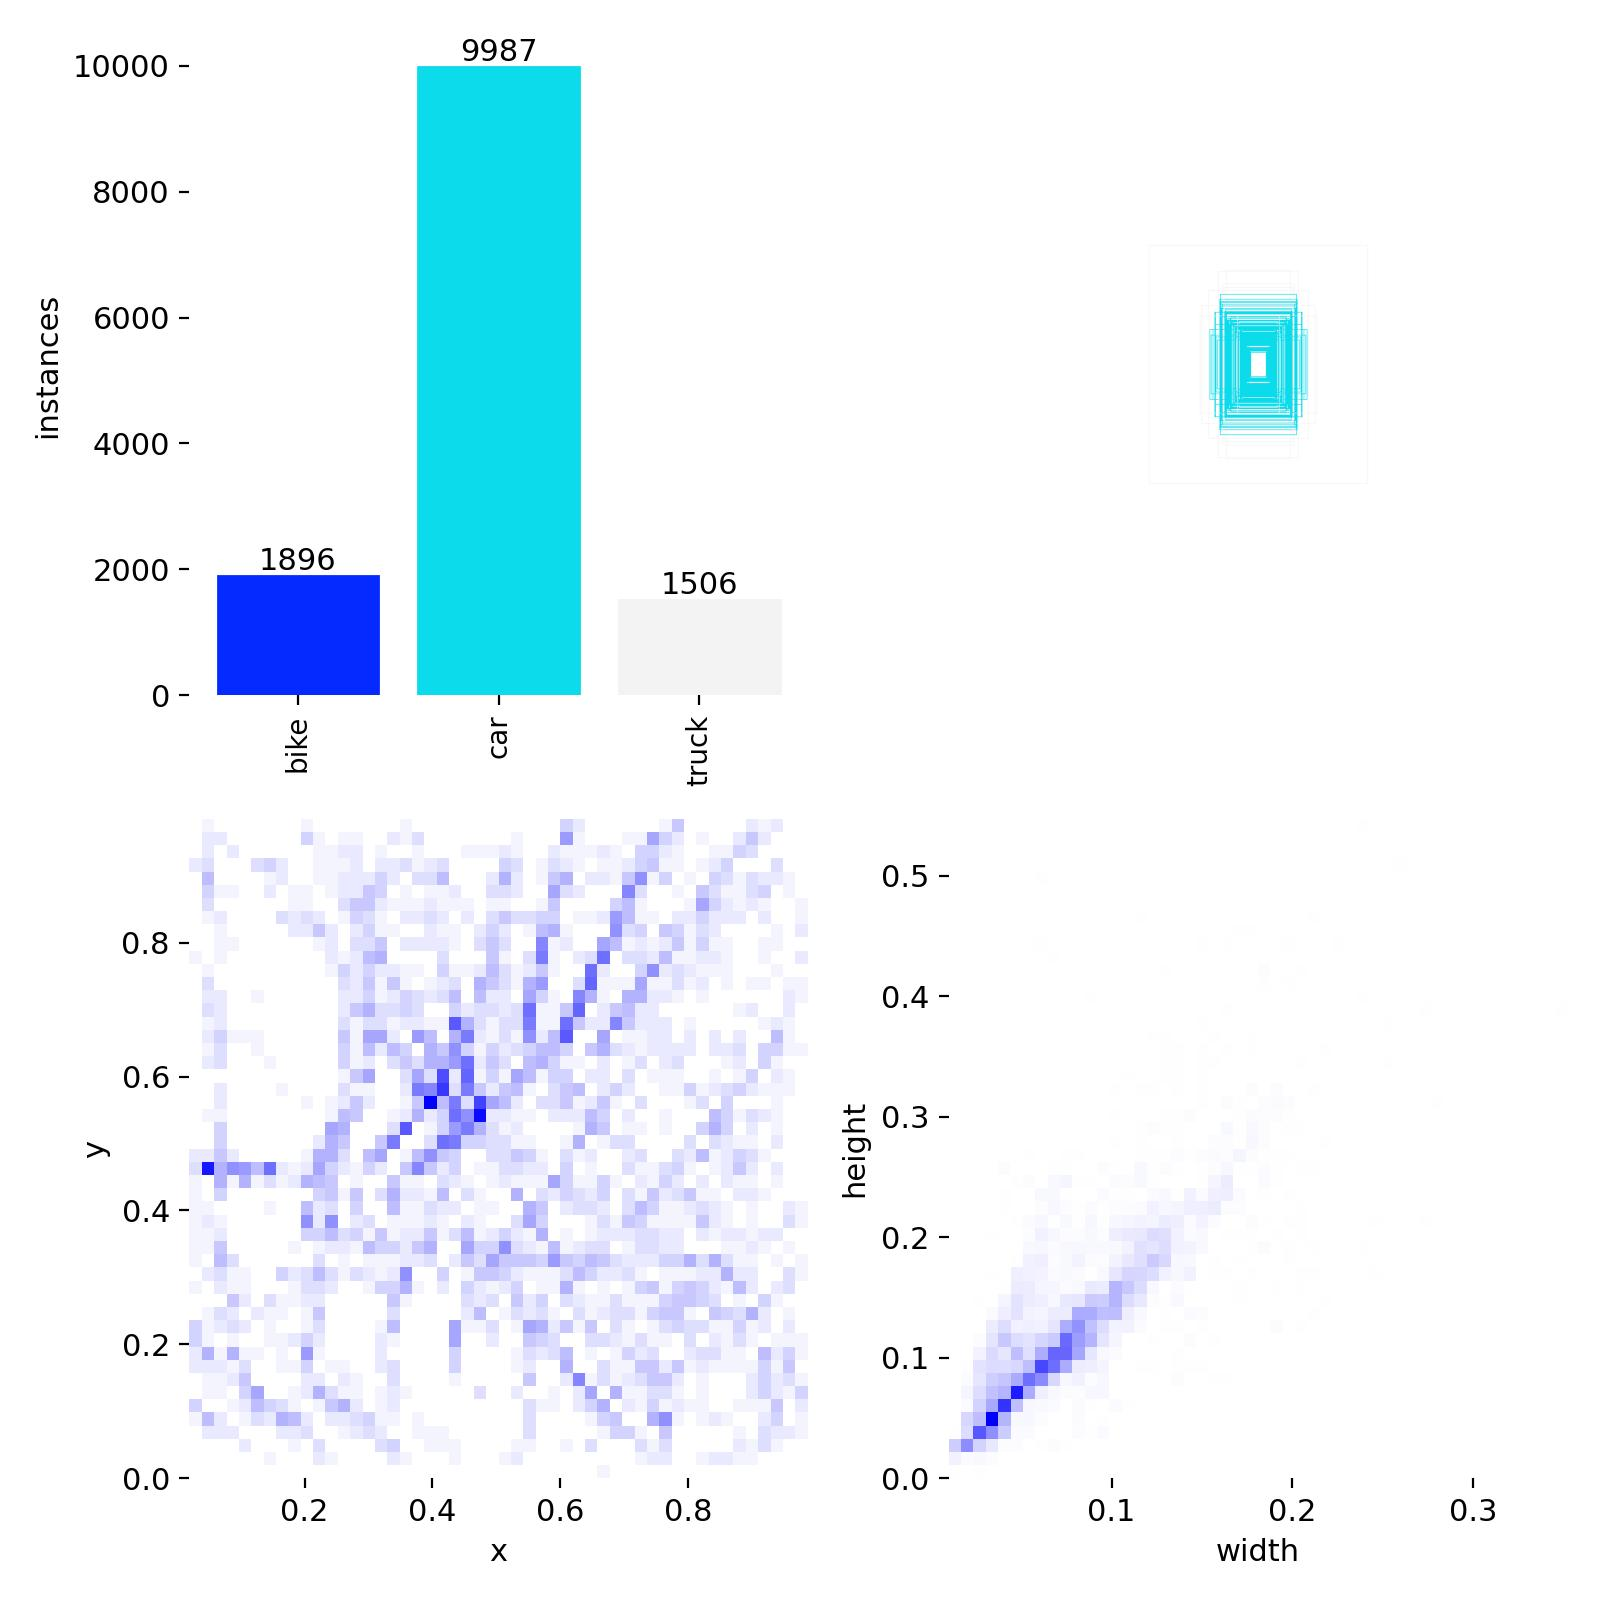

In [ ]:
Image("/content/runs/detect/train/labels.jpg", width=600)

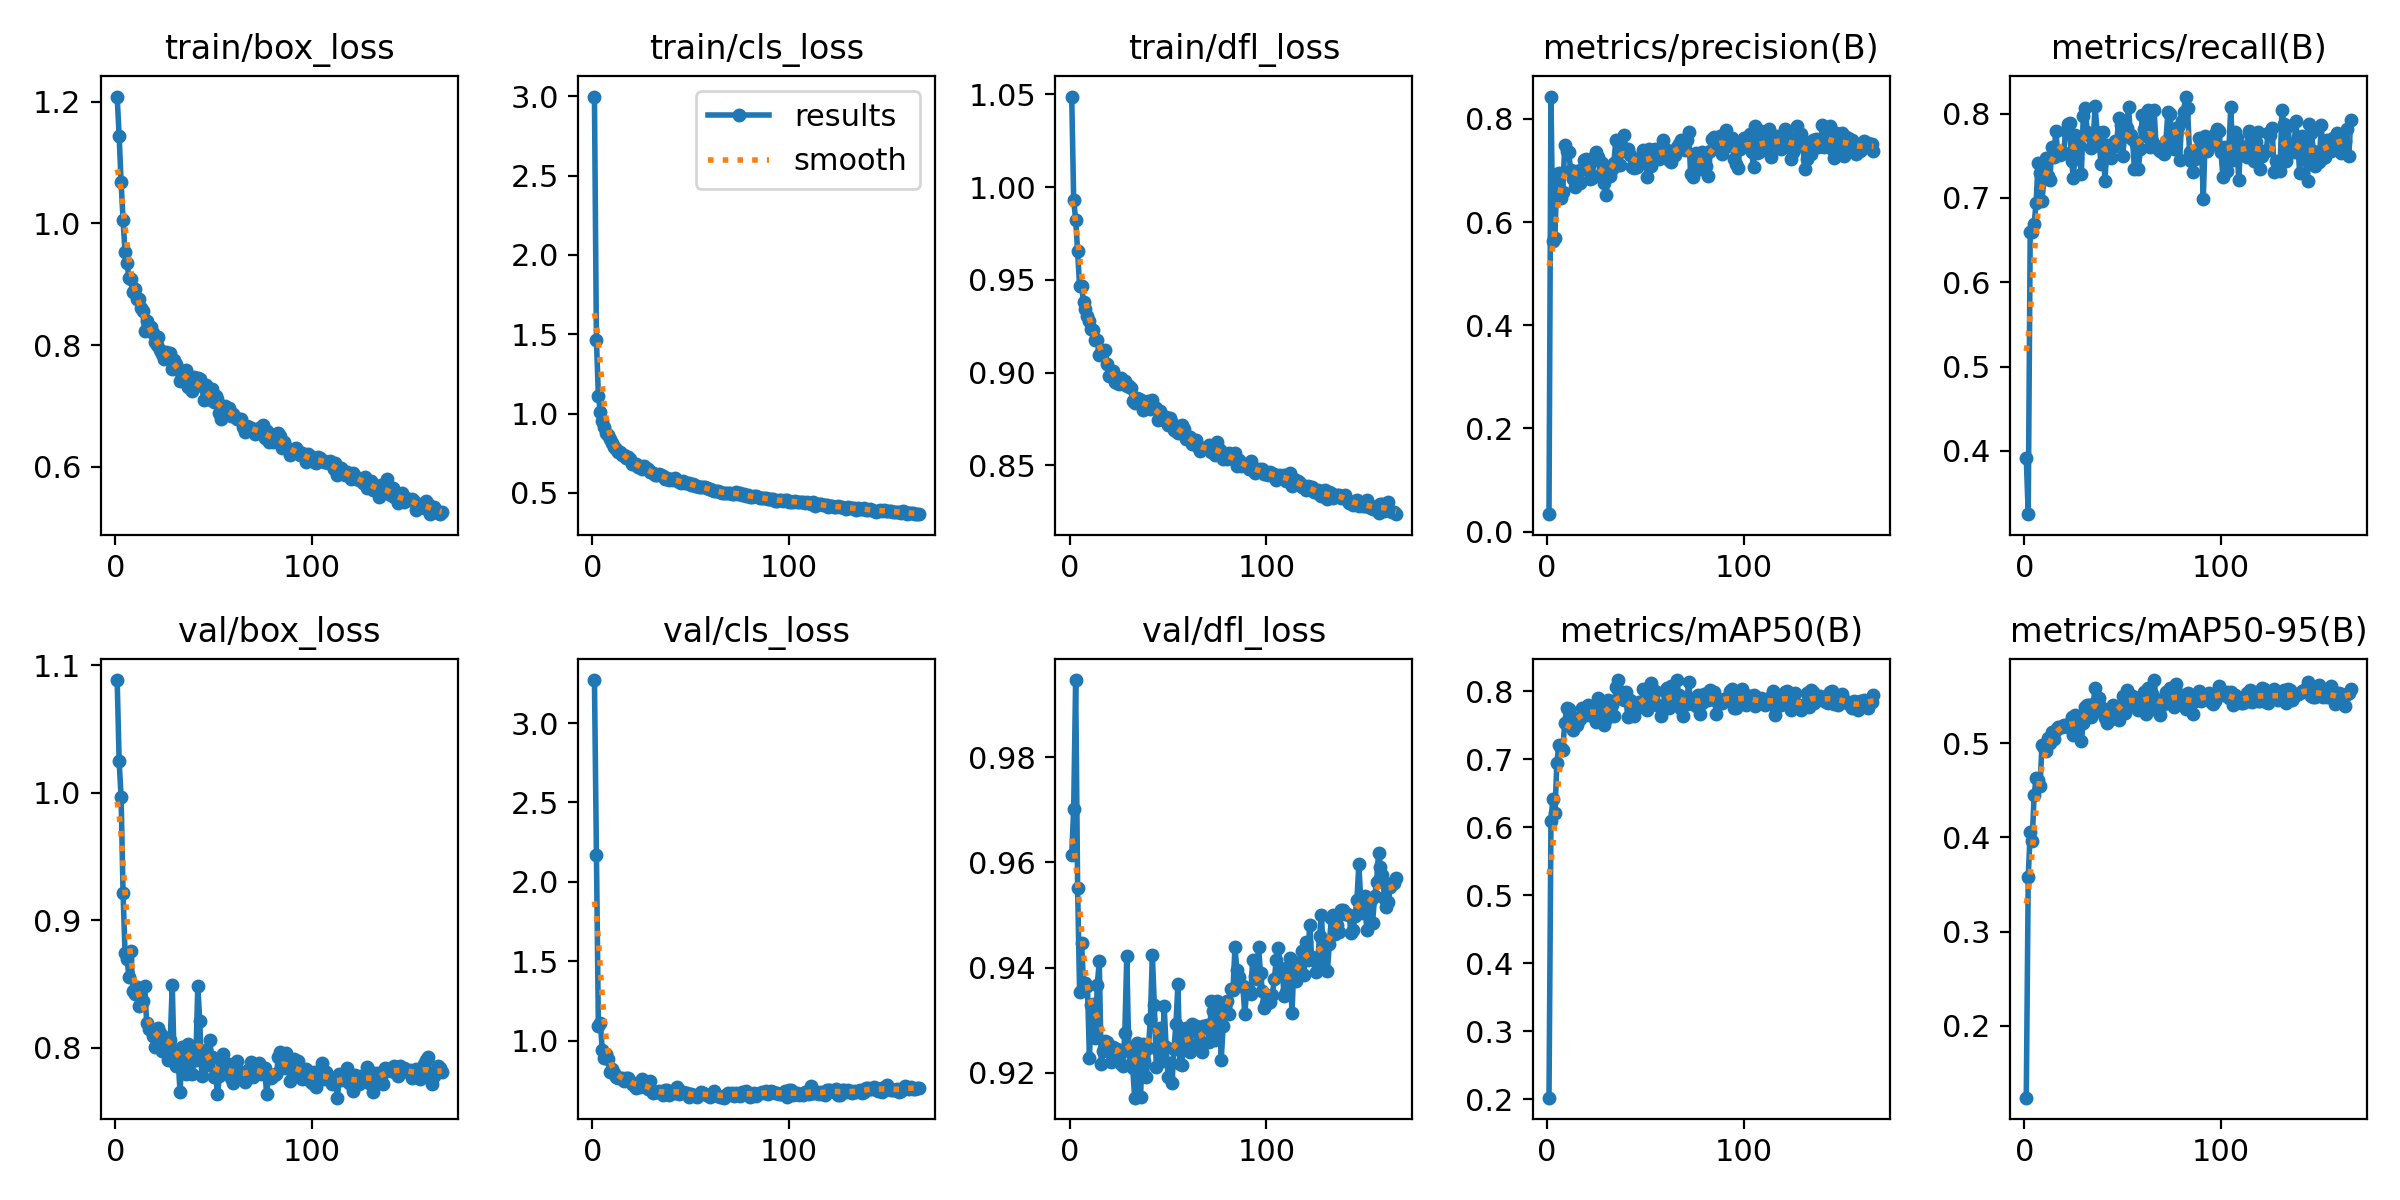

In [ ]:
Image("/content/runs/detect/train/results.png", width=600)

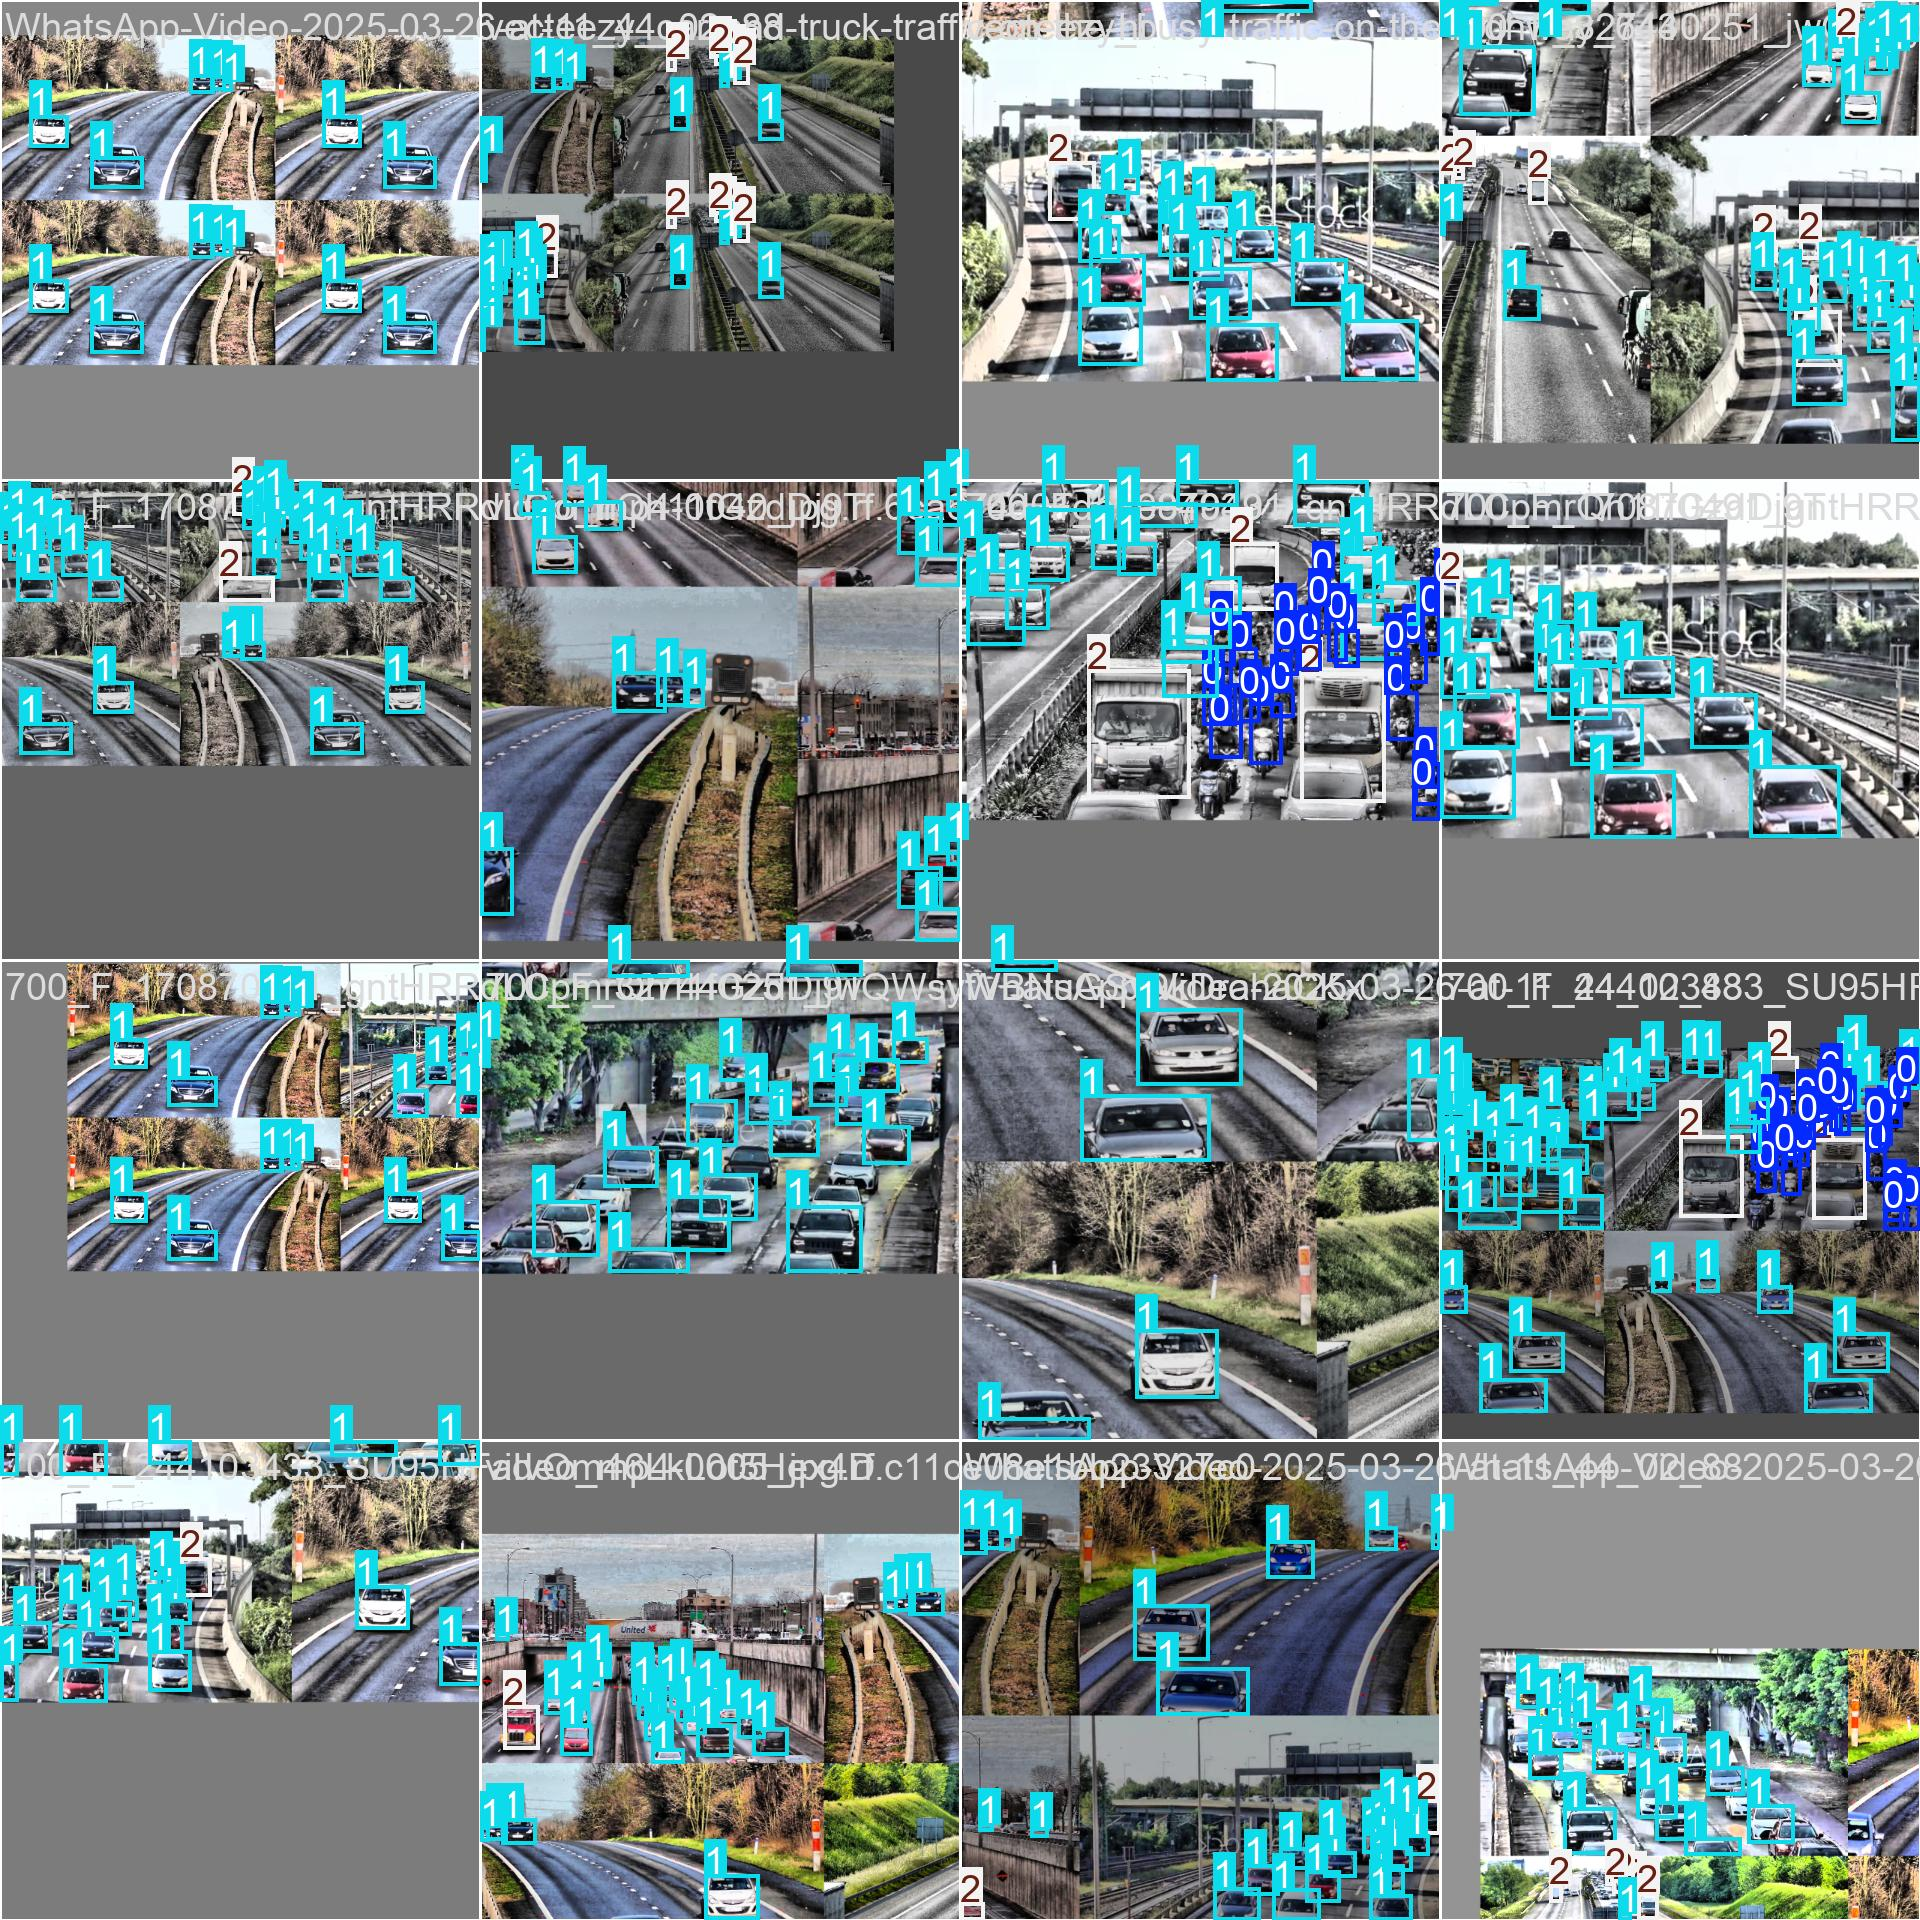

In [ ]:
Image("/content/runs/detect/train/train_batch0.jpg", width=600)

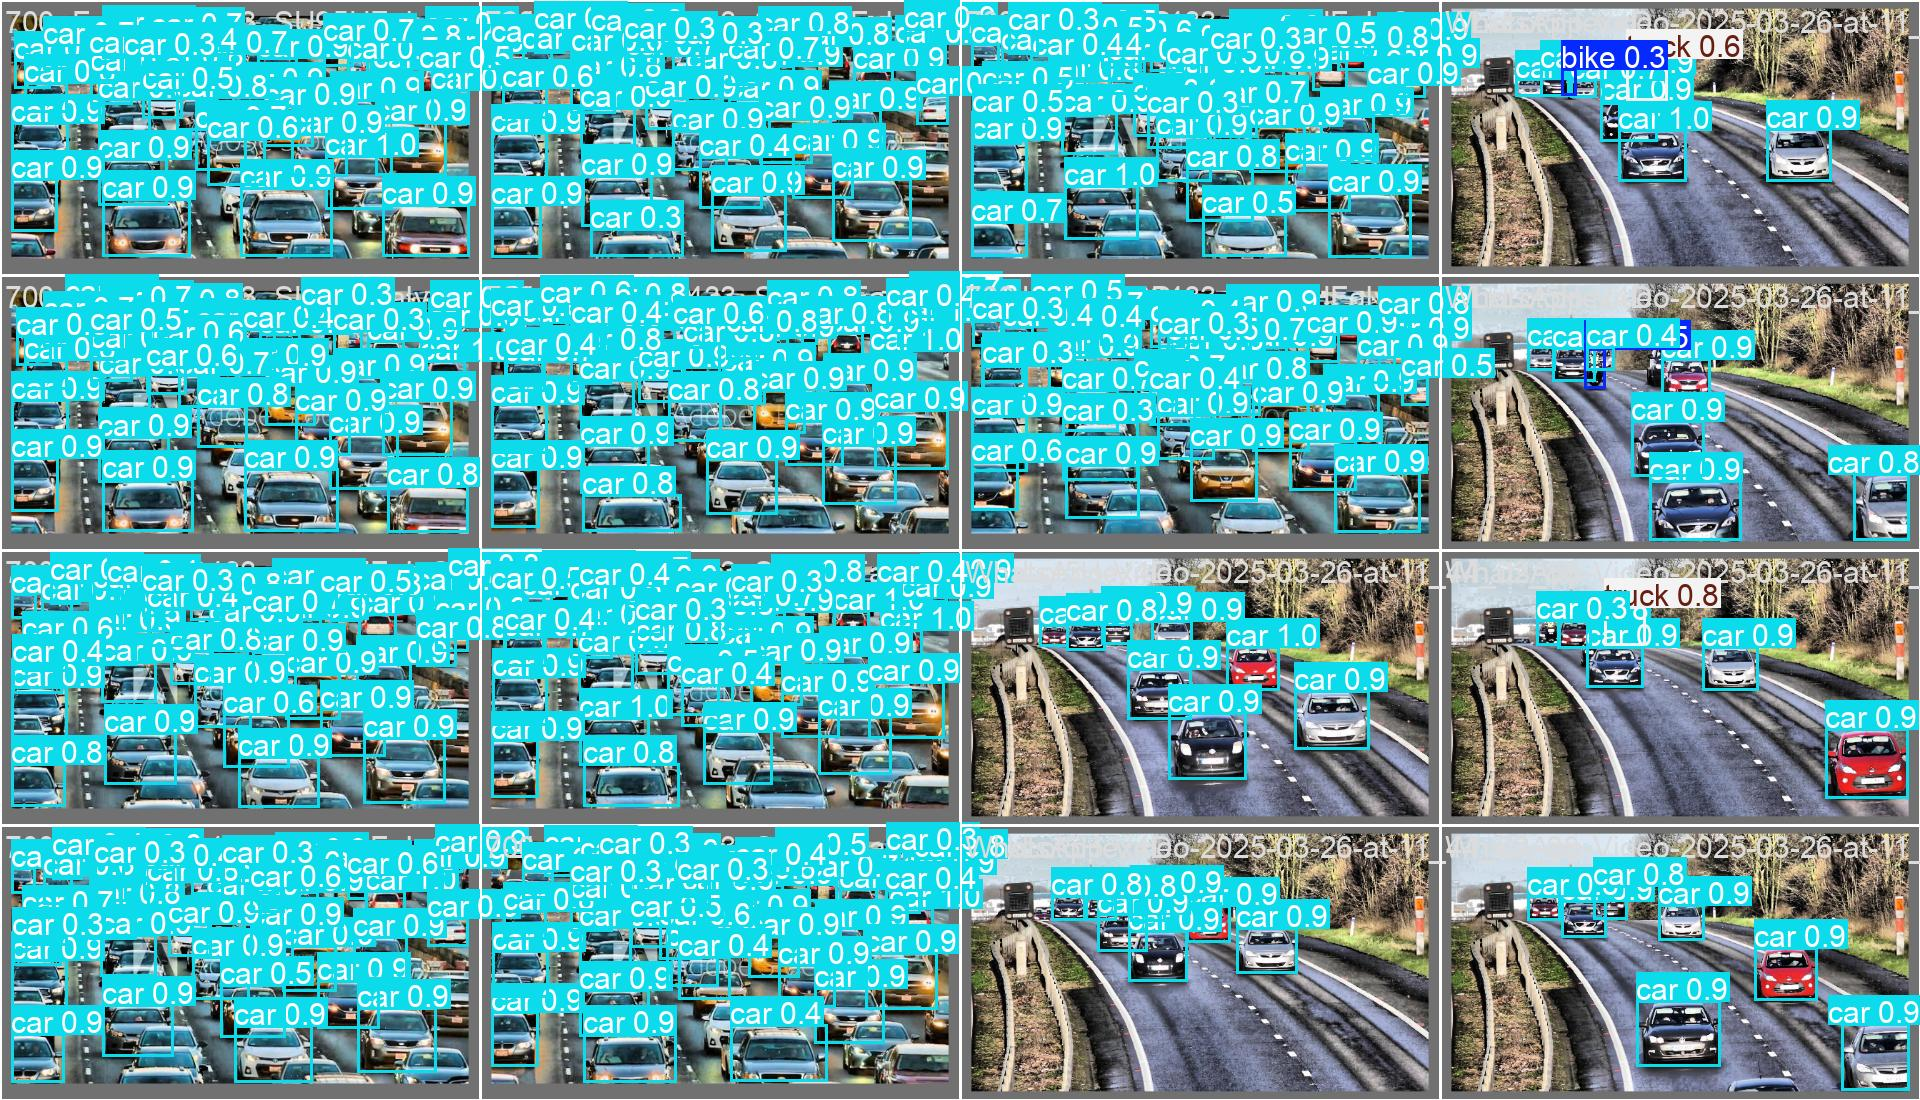

In [ ]:
Image("/content/runs/detect/train/val_batch0_pred.jpg", width=600)

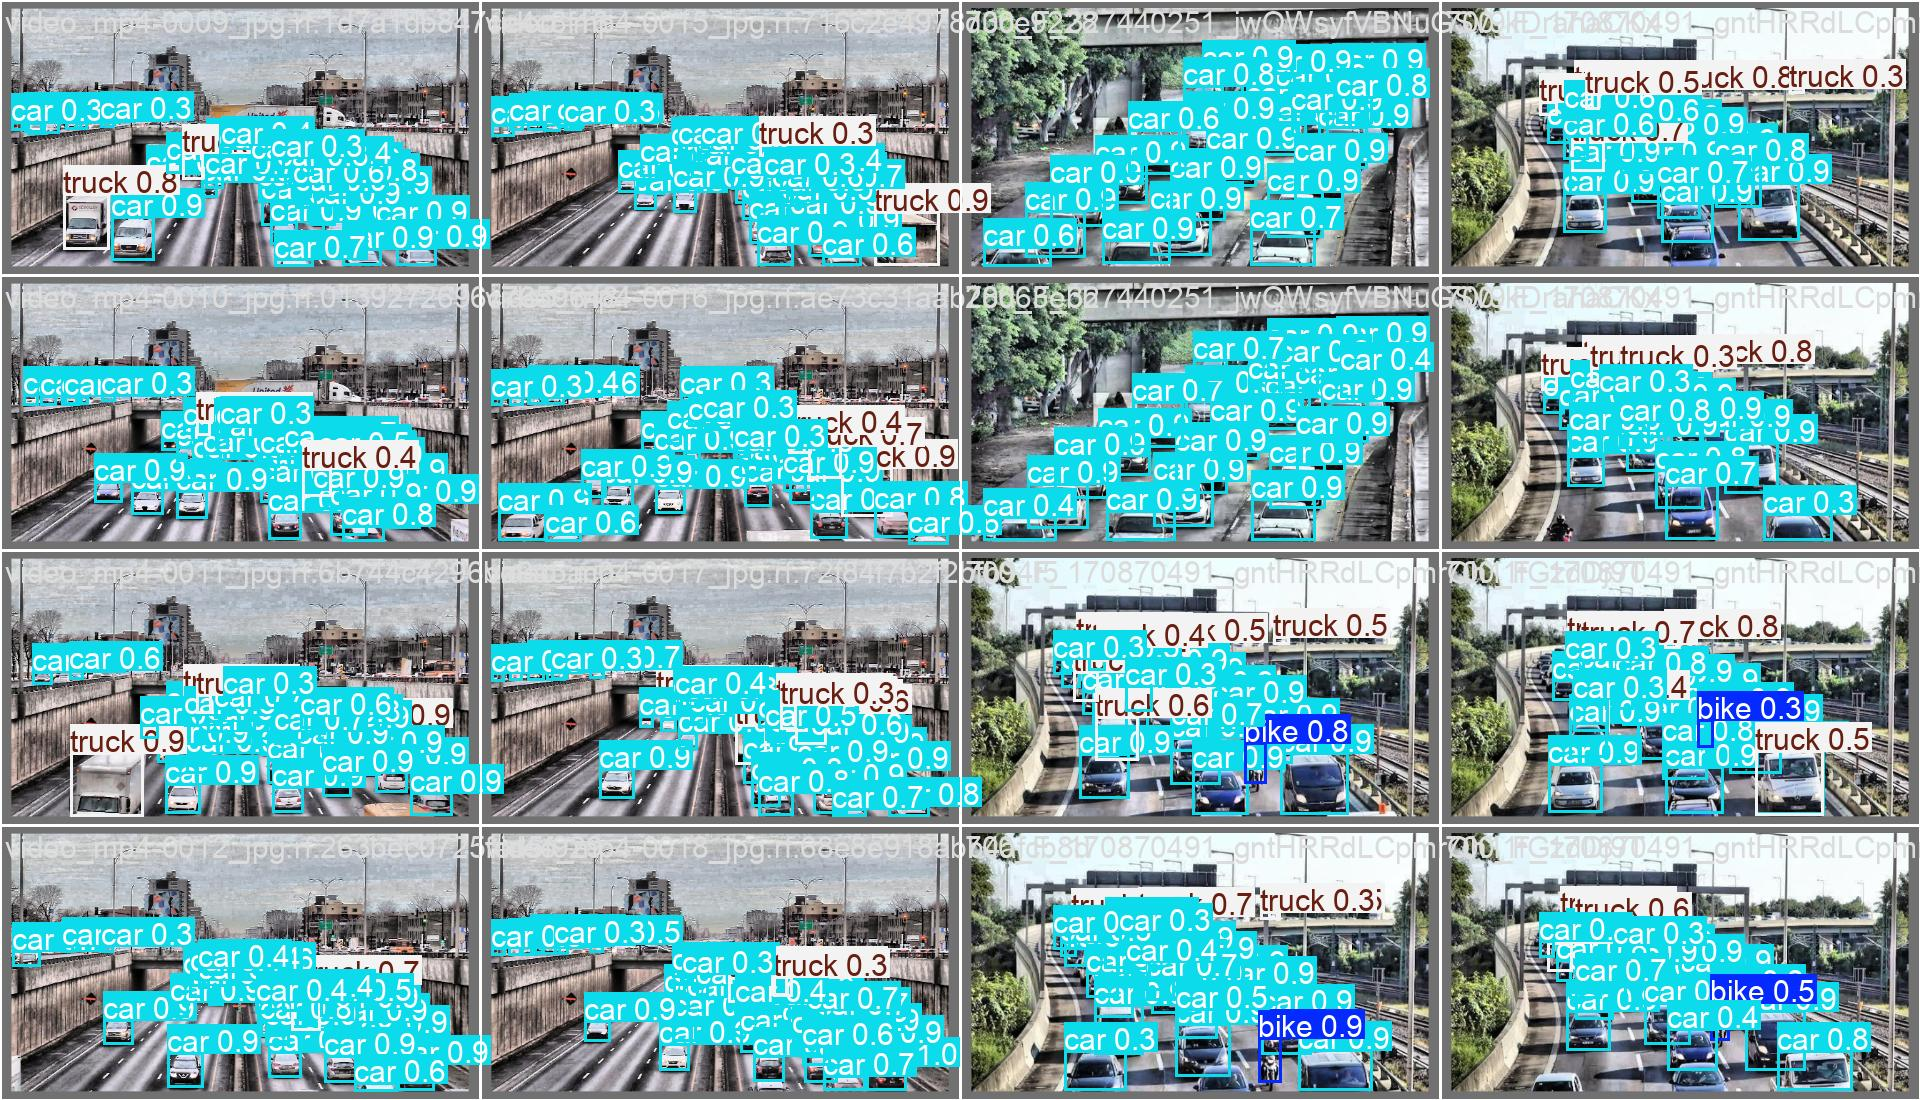

In [ ]:
Image("/content/runs/detect/train/val_batch1_pred.jpg", width=600)

**Step # 07  Validate Fine-Tuned Model**

In [ ]:
!yolo task=detect mode=val model="/content/runs/detect/train/weights/best.pt" data={dataset.location}/data.yaml

Ultralytics 8.4.14 🚀 Python-3.12.12 torch-2.10.0+cu128 CUDA:0 (Tesla T4, 14913MiB)
YOLO11n summary (fused): 101 layers, 2,582,737 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2482.4±499.6 MB/s, size: 132.0 KB)
val: Scanning /content/traffic-1/valid/labels.cache... 56 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 56/56 9.8Mit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 4/4 1.1s/it 4.4s
                   all         56       1321      0.746      0.804      0.817      0.568
                  bike         18        206      0.681      0.779      0.763       0.42
                   car         56       1026      0.825      0.858      0.906      0.753
                 truck         28         89      0.732      0.775      0.782      0.532
Speed: 6.0ms preprocess, 24.5ms inference, 0.0ms loss, 9.0ms postprocess per image
Results saved to /content/runs/detect/val2
💡 Learn more

**Step # 08 Inference with Custom Model on Images**

**Step # 08 Inference with Custom Model on Videos**

In [ ]:
!gdown "https://drive.google.com/file/d/1nWCFMFzEpGb56n1peJxilrWBVnfO197-/view?usp=sharing"

/usr/local/lib/python3.12/dist-packages/gdown/parse_url.py:48: UserWarning: You specified a Google Drive link that is not the correct link to download a file. You might want to try `--fuzzy` option or the following url: https://drive.google.com/uc?id=1nWCFMFzEpGb56n1peJxilrWBVnfO197-
  warnings.warn(
Downloading...
From: https://drive.google.com/file/d/1nWCFMFzEpGb56n1peJxilrWBVnfO197-/view?usp=sharing
To: /content/view?usp=sharing
115kB [00:00, 4.76MB/s]


In [ ]:
!gdown "https://drive.google.com/file/d/1nWCFMFzEpGb56n1peJxilrWBVnfO197"

/usr/local/lib/python3.12/dist-packages/gdown/parse_url.py:48: UserWarning: You specified a Google Drive link that is not the correct link to download a file. You might want to try `--fuzzy` option or the following url: https://drive.google.com/uc?id=None
  warnings.warn(
Downloading...
From: https://drive.google.com/file/d/1nWCFMFzEpGb56n1peJxilrWBVnfO197
To: /content/1nWCFMFzEpGb56n1peJxilrWBVnfO197
3.06kB [00:00, 8.96MB/s]


In [ ]:
!yolo task=detect mode=predict model= "/content/runs/detect/train/weights/best.pt" conf=0.25 source="/content/taffic_vdo.mp4" save=True

Ultralytics 8.4.14 🚀 Python-3.12.12 torch-2.10.0+cu128 CUDA:0 (Tesla T4, 14913MiB)
YOLO11n summary (fused): 101 layers, 2,582,737 parameters, 0 gradients, 6.3 GFLOPs

video 1/1 (frame 1/307) /content/taffic_vdo.mp4: 384x640 7 cars, 10 trucks, 57.5ms
video 1/1 (frame 2/307) /content/taffic_vdo.mp4: 384x640 9 cars, 10 trucks, 11.8ms
video 1/1 (frame 3/307) /content/taffic_vdo.mp4: 384x640 8 cars, 10 trucks, 12.0ms
video 1/1 (frame 4/307) /content/taffic_vdo.mp4: 384x640 9 cars, 10 trucks, 12.1ms
video 1/1 (frame 5/307) /content/taffic_vdo.mp4: 384x640 8 cars, 11 trucks, 22.9ms
video 1/1 (frame 6/307) /content/taffic_vdo.mp4: 384x640 9 cars, 10 trucks, 12.6ms
video 1/1 (frame 7/307) /content/taffic_vdo.mp4: 384x640 7 cars, 9 trucks, 12.1ms
video 1/1 (frame 8/307) /content/taffic_vdo.mp4: 384x640 8 cars, 9 trucks, 13.5ms
video 1/1 (frame 9/307) /content/taffic_vdo.mp4: 384x640 7 cars, 9 trucks, 11.9ms
video 1/1 (frame 10/307) /content/taffic_vdo.mp4: 384x640 8 cars, 8 trucks, 11.8ms
video 

In [ ]:
from IPython.display import HTML
from base64 import b64encode
import os

# Input video path
save_path = '/content/runs/detect/predict9/taffic_vdo.avi'

# Compressed video path
compressed_path = "/content/result_compressed.mp4"

os.system(f"ffmpeg -i {save_path} -vcodec libx264 {compressed_path}")

# Show video
mp4 = open(compressed_path,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

# Task
Modify cell `mqMDDLd28lGK` to construct the full path to the YOLO-predicted video file, use this path as the input for `ffmpeg`, and add checks to ensure both the predicted video and the compressed video files exist before proceeding with `ffmpeg` and video display operations, respectively.

## Correct FFmpeg input and video display logic

### Subtask:
Modify cell `mqMDDLd28lGK` to: 1) Construct the full path to the YOLO-predicted video file (e.g., `predict9/taffic_vdo.mp4`). 2) Use this correct path as input for `ffmpeg`. 3) Add checks to ensure the predicted video and compressed video files exist before attempting to process or display them.


## Summary:

### Data Analysis Key Findings
*   The `ffmpeg` command used for video processing in cell `mqMDDLd28lGK` required modification to correctly construct and utilize the full path to the YOLO-predicted video file (e.g., `predict9/taffic_vdo.mp4`).
*   The existing logic lacked checks to ensure the predicted and compressed video files existed before attempting to process or display them, which could lead to errors.

### Insights or Next Steps
*   The immediate next step is to implement the identified corrections in cell `mqMDDLd28lGK`, specifically by defining the correct input path for `ffmpeg` and adding file existence checks to improve the robustness of the video processing and display workflow.
